In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import rc
import glob
import re

import sys
sys.path.append('../')

import perturbations as PB
import AMC
import orbits

from tqdm import tqdm

rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=18)

In [3]:
MCdata_path = "/Users/bradkav/Projects/AMC_encounters/code/AMC_montecarlo_data/"

In [4]:
Nint_NFW = np.loadtxt(MCdata_path + 'AMC_Ninteractions_a=4.69_NFW_circ.txt')
Nint_true_NFW = np.loadtxt(MCdata_path + 'AMC_Ninteractions_true_a=4.69_NFW_circ.txt')

In [5]:
print(len(Nint_NFW))

100000


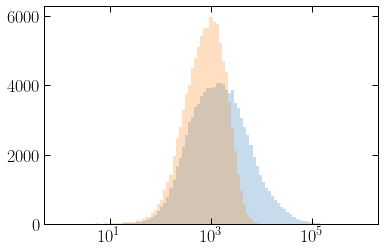

In [10]:
plt.figure()

plt.hist(Nint_NFW, bins=np.geomspace(1, 1000000, 100), alpha=0.25)
plt.hist(Nint_true_NFW, bins=np.geomspace(1, 1000000, 100), alpha=0.25)
plt.gca().set_xscale('log')

plt.show()

In [8]:
#R_list = np.loadtxt("../data/Rvals.txt")

#R_list = np.array([1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0])


#MCdata_path = "/Users/thomasedwards/Desktop/AMC_montecarlo_data/"


PROFILE = "PL"

# Gather the list of files to be used
ff1 = glob.glob(MCdata_path + 'AMC_Ninteractions_*_' + PROFILE + '_circ.txt')
R_list = np.zeros(len(ff1))

for i, fname in enumerate(ff1):
            #print(fname)
    m = re.search('AMC_Ninteractions_a=(.+?)_' + PROFILE + '_circ.txt', fname)
    if m:
        R_string = m.group(1)
        #print(R_string)
        R_list[i]  = float(R_string)       # conversion to pc
    
        #a_grid = np.loadtxt("../data/Rvals.txt", usecols=(0,), unpack=True)
        #a_grid = 1e3
R_list = np.sort(R_list)

R_list_lin = np.linspace(1, 10, 10)

R_list = np.array([R_list[np.argmin(np.abs(R - R_list))] for R in R_list_lin])
print(R_list)


[ 0.96  1.93  2.86  3.85  5.17  5.71  6.96  7.68  9.35 10.32]


In [9]:
Ntot_R_PL = []
Ntot_R_NFW = []
for R in R_list:
    print(R)
    Ntot_load_PL = np.loadtxt(MCdata_path + 'AMC_Ninteractions_true_a=%.2f_'%R + 'PL_circ.txt')
    Ntot_R_PL.append(Ntot_load_PL)
    Ntot_load_NFW = np.loadtxt(MCdata_path + 'AMC_Ninteractions_true_a=%.2f_'%R + 'NFW_circ.txt')
    Ntot_R_NFW.append(Ntot_load_NFW)
Ntot_R_PL = np.array(Ntot_R_PL) 
Ntot_R_NFW = np.array(Ntot_R_NFW) 

0.96
1.93


KeyboardInterrupt: 

In [15]:
dE_R = []
for R in R_list:
    print(R)
    Mi, Ri, Mf, Rf = np.loadtxt(MCdata_path + 'AMC_logflat_a=%.2f_'%R + PROFILE + '_circ.txt', usecols=(0, 1, 3, 4), unpack=True, delimiter=',')
    dU = (Mf**2/Rf)/(Mi**2/Ri)
    dU[Mf < 1e-25] = dU[Mf < 1e-25]*0.0
    dE_R.append(dU)

0.96
1.93
2.86
3.85
5.17
5.71
6.96
7.68
9.35
10.32


In [16]:
print(Ntot_R)
print(dE_R)

NameError: name 'Ntot_R' is not defined

In [17]:
n_lines = R_list.size
c = np.arange(0, n_lines+1)

norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
#norm = mpl.colors.LogNorm(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.magma)
cmap.set_array([])

10.32


<Figure size 504x360 with 0 Axes>

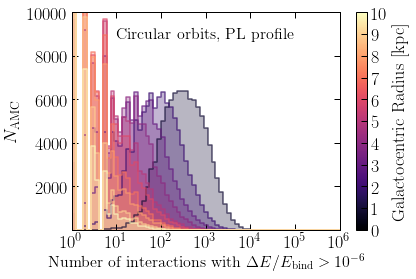

In [19]:
plt.figure(figsize=(7,5))
fig, ax = plt.subplots()
print(R_list[-1])
for i in range(R_list.size):
#     pdf, bin_edges = np.histogram(Ntot_R[i], bins=np.geomspace(Ntot_R[i].min()+1, Ntot_R[i].max(), 10), density=True)
#     bin_c = bin_edges[:-1] + np.diff(bin_edges)/2
    counts, edges, patches = plt.hist(Ntot_R_PL[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(i + 1), alpha=0.3)
    plt.step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)
    #plt.hist(Ntot_R[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(R_list[i]), alpha=0.3)
#     plt.plot(bin_c, pdf, c=cmap.to_rgba(i + 1))
    
ax.set_xscale('log')
ax.set_xlim(1,1e6)
ax.set_ylim(1,10000)
ax.text(10e0, 8800, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
#ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
ax.set_xticks(np.geomspace(1, 1e6, 7))

ax.set_xlabel(r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=16)
ax.set_ylabel('$N_\mathrm{AMC}$')

fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]')
plt.savefig('../../plots/Ndist_' + PROFILE + '_circ.pdf', bbox_inches='tight')

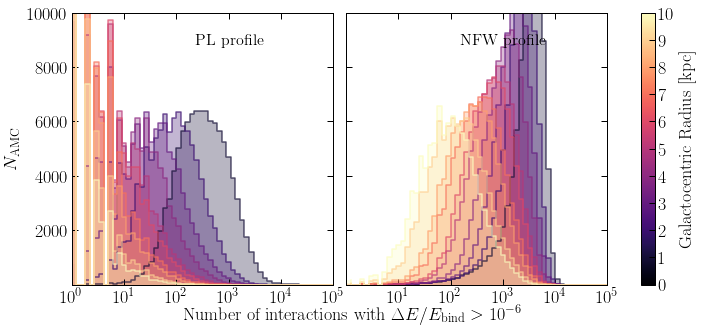

In [26]:
#plt.figure(figsize=(10,5))
fig, axes = plt.subplots(ncols=2, sharey=True,figsize=(12,5))
for i in range(R_list.size):
    counts, edges, patches = axes[0].hist(Ntot_R_PL[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(i + 1), alpha=0.3)
    axes[0].step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)

for i in range(R_list.size):
    counts, edges, patches = axes[1].hist(Ntot_R_NFW[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(i + 1), alpha=0.3)
    axes[1].step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)

for ax in axes:
    ax.set_xscale('log')
    ax.set_xlim(1,1e5)
    ax.set_ylim(1,10000)
    #ax.text(10e0, 8800, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
    #ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
    #ax.set_xticks(np.geomspace(1, 1e6, 7))

    #ax.set_xlabel(r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=16)

fig.text(0.45, 0.02, r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=18, ha='center')
axes[0].set_ylabel('$N_\mathrm{AMC}$')
axes[0].text(1e3, 8800, r"PL profile", fontsize=16, ha='center')
axes[1].text(1e3, 8800, r"NFW profile", fontsize=16, ha='center')

axes[0].set_xticks(np.geomspace(1, 1e5, 6))
axes[1].set_xticks(np.geomspace(10, 1e5, 5))

fig.subplots_adjust(wspace = 0.05)

#[Left, Bottom, Width, Height]
#cax = plt.axes([0.9, 0.1, 0.025, 0.8])
fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]',ax = axes)

plt.savefig('../../plots/Ndist_circ_combined1.pdf', bbox_inches='tight')

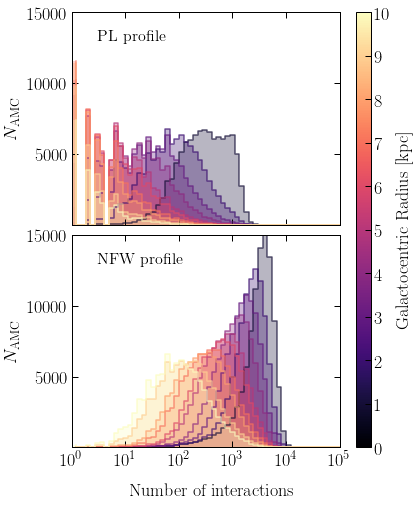

In [38]:
#plt.figure(figsize=(10,5))
fig, axes = plt.subplots(nrows=2, sharey=True,figsize=(6,8))
for i in range(R_list.size):
    counts, edges, patches = axes[0].hist(Ntot_R_PL[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(i + 1), alpha=0.3)
    axes[0].step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)

for i in range(R_list.size):
    counts, edges, patches = axes[1].hist(Ntot_R_NFW[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(i + 1), alpha=0.3)
    axes[1].step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)

for ax in axes:
    ax.set_xscale('log')
    ax.set_xlim(1,1e5)
    ax.set_ylim(1,15000)
    #ax.text(10e0, 8800, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
    #ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
    ax.set_xticks(np.geomspace(1, 1e5, 6))

    #ax.set_xlabel(r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=16)

#fig.text(0.45, 0.04, r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=18, ha='center')
fig.text(0.45, 0.04, r'Number of interactions', fontsize=18, ha='center')
axes[0].set_ylabel('$N_\mathrm{AMC}$')
axes[1].set_ylabel('$N_\mathrm{AMC}$')
axes[0].text(3, 13000, r"PL profile", fontsize=16, ha='left')
axes[1].text(3, 13000, r"NFW profile", fontsize=16, ha='left')

axes[0].set_xticklabels([])
axes[1].set_xticks(np.geomspace(1, 1e5, 6))
#axes[1].set_xticks(np.geomspace(10, 1e6, 6))

fig.subplots_adjust(hspace = 0.05)

#[Left, Bottom, Width, Height]
#cax = plt.axes([0.9, 0.1, 0.025, 0.8])
fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]',ax = axes, aspect=30)

plt.savefig('../../plots/Ndist_circ_combined2.pdf', bbox_inches='tight')

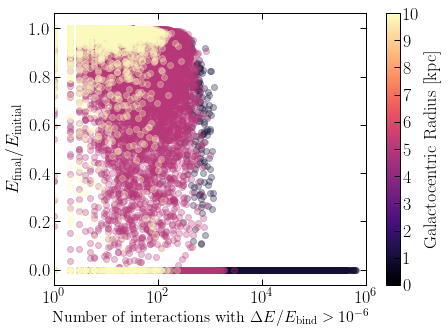

In [29]:
fig, ax = plt.subplots(figsize=(7,5))
for i in [0, 4,9]:
#for i in range(R_list.size):
    plt.scatter(Ntot_R[i], dE_R[i],color=cmap.to_rgba(i + 1), alpha=0.3)
    
ax.set_xlim(1,1e6)

#ax.set_ylim(1e-3, 1)
ax.set_xscale('log')
#ax.set_yscale('log')


ax.set_xlabel(r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=16)
ax.set_ylabel('$E_\mathrm{final}/E_\mathrm{initial}$')

fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]')
plt.savefig('../plots/N_vs_dE_' + PROFILE + '_circ.pdf', bbox_inches='tight')
plt.show()

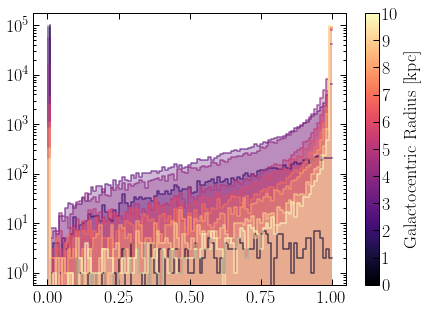

In [39]:
fig, ax = plt.subplots(figsize=(7,5))
#print(R_list[-1])
for i in range(R_list.size):
    #print(i)
#     pdf, bin_edges = np.histogram(Ntot_R[i], bins=np.geomspace(Ntot_R[i].min()+1, Ntot_R[i].max(), 10), density=True)
#     bin_c = bin_edges[:-1] + np.diff(bin_edges)/2
    counts, edges, patches = plt.hist(dE_R[i], bins=np.linspace(0, 1, 100),color=cmap.to_rgba(i + 1), alpha=0.3)
    plt.step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)
    #plt.hist(Ntot_R[i], bins=np.geomspace(1, 1e6, 70),color=cmap.to_rgba(R_list[i]), alpha=0.3)
#     plt.plot(bin_c, pdf, c=cmap.to_rgba(i + 1))
    
ax.set_yscale('log')
#ax.set_xlim(1,1e6)
#ax.set_ylim(1,10000)
#ax.text(10e0, 8800, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
#ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
#ax.set_xticks(np.geomspace(1, 1e6, 7))

#ax.set_xlabel(r'Number of interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$', fontsize=16)
#ax.set_ylabel('$N_\mathrm{AMC}$')

fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]')
plt.savefig('../plots/dE_' + PROFILE + '_circ.pdf', bbox_inches='tight')

In [15]:
def generate_sample(R, prof='PL'):
    dE_list = []
    R_GC = 1e3*R
    orb = orbits.elliptic_orbit(R_GC, e=0)
    v_circ = orb.vis_viva_r(R_GC)
    #print(v_circ*3.086e+13)
    
    Nsamp = 10
    
    sig_rel = PB.sigma(R_GC)
    Mi, deltai = np.loadtxt(MCdata_path + 'AMC_logflat_a=%.2f_'%R + prof + '_circ.txt', usecols=(0, 2), unpack=True, delimiter=',')
    
    for M, delta in tqdm(zip(Mi, deltai)):
        minicluster = AMC.AMC(M, delta, prof)
        E_test = PB.Elist(sig_rel, 1.0, 1.0, minicluster.M, Rrms2 = minicluster.Rrms2())
        N_cut = 1e6
        bmax = ((E_test/minicluster.Ebind())*N_cut)**(1./4)
        #print(bmax)
        Vlist = PB.dPdV(v_circ, PB.sigma(R_GC), Nsamples=Nsamp)
        blist = bmax*np.sqrt(np.random.rand(Nsamp))
        #print(blist)
        for i in range(Nsamp):
            dE = PB.Elist(Vlist[i], blist[i], 1.0, minicluster.M, Rrms2 = minicluster.Rrms2())/minicluster.Ebind()
            dE_list.append(dE)
    return dE_list

In [14]:
dE_list_R = []
for R in R_list:
    print(R)
    dE_list_R.append(generate_sample(R, prof="NFW"))

0.96


966it [00:00, 4820.39it/s]

0.1907434892401532
0.11052227981644755
0.1347696689190413
0.08020867894965972
0.23697335071738082
0.15505184033337446
0.21473706498988984
0.24252969438905686
0.11797702165610345
0.12868745494167852
0.13423907322360565
0.07241943111305421
0.09919736017353346
0.06786066177151495
0.19207798584064087
0.23054461517664468
0.15380599335181175
0.14732630389355486
0.13426524919640945
0.14188186969998917
0.07819903165323536
0.263222679891892
0.3157731842731362
0.18663686134596597
0.10215592032464309
0.24447628543796293
0.27395187728553333
0.1358737841812406
0.4859485383415663
0.14635520757525006
0.2959516464682055
0.3308688373298967
0.20420214076448548
0.17716494533236843
0.1321431459939158
0.12601944698068482
0.17985587945346623
0.0705904097228006
0.22689884547606246
0.08649034043433536
0.09712876545396236
0.31469013159469567
0.05623490783666678
0.2877440469129058
0.05679038523933371
0.16458299036798962
0.20756330451704108
0.06555490301982717
0.14049278593206355
0.06435764890052939
0.1017225715

1214it [00:00, 1513.97it/s]

0.17121605125529404
0.16808341310069663
0.03524013738435226
0.26097408156636803
0.13797241746128225
0.10263119966723262
0.08678394684216206
0.05894175805762179
0.07172588463751238
0.17454635712631514
0.09955475679561983
0.18377808441740293
0.20574720175803668
0.1149097757632765
0.05115215747933653
0.09904292902224061
0.05869880386269875
0.3133650327194891
0.10166127124308395
0.031043502148770333
0.22616729182810227
0.5326118882017372
0.28020383483242817
0.11887583414337957
0.11975571391789028
0.40370989523364786
0.23882420666120127
0.10645678209427709
0.20714326416775106
0.17602990410190128
0.25805830463076646
0.1591538589144067
0.10126542269556886
0.16159412776423646
0.31033423697907614
0.19940068811356004
0.32447104008151073
0.0686119359567059
0.28069594994522035
0.1434783192128062
0.3348499282260744
0.11531464975336969
0.07649792982800095
0.18359656455459353
0.057359711531663624
0.10222085714124335
0.11872276419110726
0.2664340041058488
0.10018144060628838
0.06766439986097068
0.2225

1845it [00:01, 1550.89it/s]


0.6101977788067382
0.1784406712400793
0.1428962121774272
0.18670985242185364
0.17894175804990897
0.100306719697135
0.1106520475159366
0.2930846168498046
0.3017865908067761
0.1342123816477112
0.2559391249866998
0.11728152178780604
0.12286030901278082
0.15924409055805958
0.1515581258480872
0.15542882757628274
0.300777282680383
0.3077338363187817
0.08650167778544958
0.1975528990430629
0.09395877355952498
0.2403505796950701
0.07886512583400856
0.28284947261026655
0.22306290805317952
0.04037059154010921
0.1360746314160991
0.1478953893400923
0.312876656435402
0.11949625148069591
0.3660874942952081
0.2340641150889536
0.08386698005708279
0.09366804288267791
0.24438794703545216
0.15483716889705024
0.14648321988897348
0.10596890087133026
0.23876667330751986
0.33198543303694206
0.1810287622593491
0.172065996770931
0.13689496119355482
0.3959610280520915
0.35227290555681073
0.3952001669222684
0.10226865380690402
0.12299461948377961
0.26828533479589367
0.09904519707556171
0.26375223260505726
0.2161

2319it [00:01, 1462.13it/s]

0.10360077048262241
0.23796032771068726
0.09269771714968666
0.3716749750097529
0.14093960883314507
0.05012910931967758
0.12996095659657864
0.024001964961181507
0.13297132230508762
0.16508294971006585
0.25000991861945027
0.12087646206543834
0.04689792079900157
0.17371082120717157
0.11607250533870493
0.29722024383826023
0.23421485159837627
0.10659372834052386
0.12949943046705062
0.13660782480509953
0.06817363025056314
0.17874258088413864
0.2894881504382143
0.253975934989117
0.14848450824783538
0.06731744682381609
0.112231358954444
0.22627926290254688
0.10625124646689933
0.18204454788603666
0.26160357727807054
0.1835365380964272
0.1485671581723267
0.13826211157906204
0.20695978674534973
0.2901351972541585
0.342913452008103
0.09669967273716258
0.24078247978971332
0.15225170070453822
0.25594300472633086
0.3866994545437307
0.26982763831993606
0.12649931344242554
0.06920886109714253
0.15066629090842987
0.11471331389132118
0.12082710475539041
0.24432002670415764
0.2355898240914593
0.1927182469

2894it [00:02, 1396.35it/s]


0.1735910096025289
0.08810489574799492
0.1172654508512539
0.3522483396204789
0.09765035685352863
0.10076053218305613
0.11377402402892565
0.21780547725604602
0.1843369684333712
0.27346503038026126
0.13429033814967897
0.11634953638951133
0.04513304440948838
0.14434340670900522
0.36720871361483876
0.09064718972603025
0.28346955462200824
0.12253694105636818
0.16256862474606432
0.12083974509962202
0.23535277784012418
0.08882548388318451
0.05360067362253937
0.10289470760366032
0.07444630660405802
0.13062965884472652
0.3028915220868932
0.16761403508383246
0.12349814040840104
0.07366403250929791
0.055904540487232555
0.10871908742285413
0.1418752755963647
0.05223039892345754
0.29778242218095635
0.1662634275822115
0.11955517919667343
0.1438790413148277
0.06092895691402812
0.18087353535834946
0.08227887208241681
0.0794638305057588
0.29454994379412064
0.18148877900354038
0.27653424845813146
0.27017104495493455
0.20815286023110263
0.12360537255104781
0.1453186589778289
0.10593044454534829
0.078882


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/bradkav/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-fe4afee63132>", line 4, in <module>
    dE_list_R.append(generate_sample(R, prof="NFW"))
  File "<ipython-input-10-b8b03ad815ce>", line 18, in generate_sample
    print(bmax)
  File "/Users/bradkav/anaconda3/lib/python3.6/site-packages/ipykernel/iostream.py", line 376, in write
    self.pub_thread.schedule(lambda : self._buffer.write(string))
  File "/Users/bradkav/anaconda3/lib/python3.6/site-packages/ipykernel/iostream.py", line 203, in schedule
    self._event_pipe.send(b'')
  File "zmq/backend/cython/socket.pyx", line 636, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 683, in zmq.backend.cython.socket.Socket.send
  File "zmq/backend/cython/socket.pyx", line 201, in zmq.backend.cython.socket._send_copy
  File "zmq

KeyboardInterrupt: 

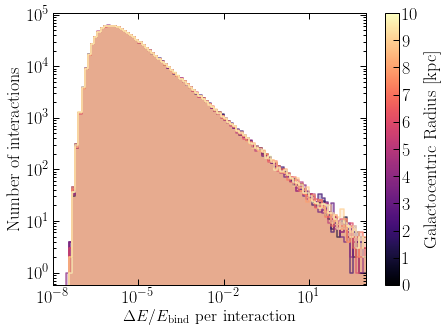

In [97]:
fig, ax = plt.subplots(figsize=(6,5))
#print(R_list[-1])
#for i in [0,]:
#for i in range(R_list.size):
    counts, edges, patches = plt.hist(dE_list_R[7], bins=np.geomspace(1e-8, 1e3, 100),color=cmap.to_rgba(i + 1), alpha=0.3)
    plt.step(edges[1:], counts, color=cmap.to_rgba(i + 1),alpha=0.7)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-8,1e3)
#ax.axvline(1e-6, linestyle='--', color='k')
#ax.set_ylim(1,10000)
#ax.text(10e0, 8800, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
#ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
#ax.set_xticks(np.geomspace(1, 1e6, 7))

ax.set_xlabel(r'$\Delta E/E_\mathrm{bind}$ per interaction', fontsize=16)
ax.set_ylabel('Number of interactions')

fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]')
plt.savefig('../plots/dE_' + PROFILE + '_circ.pdf', bbox_inches='tight')

In [13]:
dE_list_PL = generate_sample(R_list[7], prof='PL')
#dE_list_NFW = generate_sample(R_list[7], prof='NFW')

100000it [00:11, 8610.59it/s]


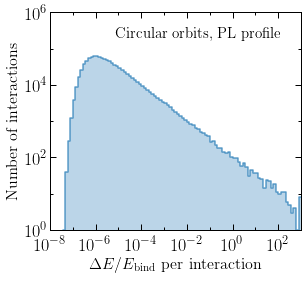

In [14]:
fig, ax = plt.subplots(figsize=(4.5,4))
#print(R_list[-1])
#for i in [0,]:
#for i in range(R_list.size):
counts, edges, patches = plt.hist(dE_list_PL, bins=np.geomspace(1e-8, 1e3, 100),color='C0', alpha=0.3)
plt.step(edges[1:], counts, color='C0',alpha=0.7)

#counts, edges, patches = plt.hist(dE_list_NFW, bins=np.geomspace(1e-8, 1e3, 100),color='C8', alpha=0.3)
#plt.step(edges[1:], counts, color='C8',alpha=0.7)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-8,1e3)
ax.set_ylim(1, 1e6)
#ax.axvline(1e-6, linestyle='--', color='k')
#ax.set_ylim(1,10000)
ax.text(7e-6, 200000, r"Circular orbits, " + PROFILE + " profile", fontsize=15)
#ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
#ax.set_xticks(np.geomspace(1, 1e6, 7))
ax.set_xticks(np.geomspace(1e-8, 1e3, 12), minor=True)
ax.set_xticklabels([], minor=True)
ax.set_xticks([1e-8, 1e-6, 1e-4, 1e-2, 1e0, 1e2])

ax.set_yticks(np.geomspace(1, 1e6, 7), minor=True)
ax.set_yticklabels([], minor=True)

ax.yaxis.set_tick_params(pad=2)
ax.xaxis.set_tick_params(pad=8)

ax.set_xlabel(r'$\Delta E/E_\mathrm{bind}$ per interaction', fontsize=16)
ax.set_ylabel('Number of interactions', fontsize=16)

#fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]')
plt.savefig('../plots/dE_hist_circ.pdf', bbox_inches='tight')

In [10]:
dE_grid = np.geomspace(1e-8, 1e3, 100)
dE_count = np.array([np.sum(dE_list_PL > dE) for dE in dE_grid])
print(dE_count)
dE_count = dE_count/dE_count[0]

[1000000 1000000 1000000 1000000 1000000 1000000  999999  999963  999663
  998453  994680  985625  968984  942277  905176  858507  804532  745416
  683491  621795  562058  505425  452333  403147  358424  317928  281577
  249143  219970  194276  171240  150973  132850  117093  103207   90870
   79781   70345   61939   54527   47960   42129   37112   32704   28701
   25279   22264   19590   17278   15255   13402   11754   10363    9112
    8016    7114    6250    5539    4847    4262    3726    3275    2914
    2531    2219    1976    1745    1559    1385    1252    1118     971
     856     754     670     591     532     460     405     348     306
     271     236     206     179     154     133     113      97      82
      77      72      61      58      55      49      46      42      34
      31]


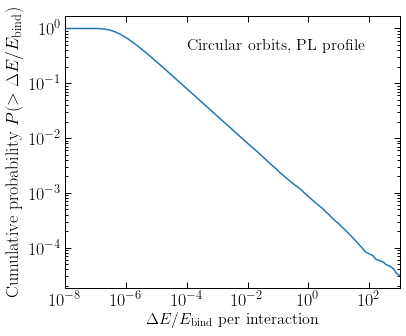

In [26]:
fig, ax = plt.subplots(figsize=(6,5))
#print(R_list[-1])
#for i in [0,]:
#for i in range(R_list.size):
#counts, edges, patches = plt.hist(dE_list_PL, bins=np.geomspace(1e-8, 1e3, 100),color='k', alpha=0.3)
#plt.step(edges[1:], counts, color='k',alpha=0.7)

plt.plot(dE_grid, dE_count)

#counts, edges, patches = plt.hist(dE_list_NFW, bins=np.geomspace(1e-8, 1e3, 100),color='C8', alpha=0.3)
#plt.step(edges[1:], counts, color='C8',alpha=0.7)
    
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(1e-8,1e3)
#ax.axvline(1e-6, linestyle='--', color='k')
#ax.set_ylim(1,10000)
ax.text(1e-4, 0.4, r"Circular orbits, " + PROFILE + " profile", fontsize=16)
#ax.text(2e0, 10200, r"Only interactions with $\Delta E/E_\mathrm{bind} > 10^{-6}$", fontsize=14)
#ax.set_xticks(np.geomspace(1, 1e6, 7))

ax.set_xlabel(r'$\Delta E/E_\mathrm{bind}$ per interaction', fontsize=16)
ax.set_ylabel('Cumulative probability $P(> \Delta E/E_\mathrm{bind})$')

#fig.colorbar(cmap, ticks = np.linspace(0, 10, 11), label='Galactocentric Radius [kpc]')
plt.savefig('../plots/dE_cumulative_circ.pdf', bbox_inches='tight')